# First Issue : Clustering

In [1]:
import pandas as pd

In [6]:
# Read Data

market_best = pd.read_csv("Q1_data.csv")

<Axes: xlabel='market_cap', ylabel='volume'>

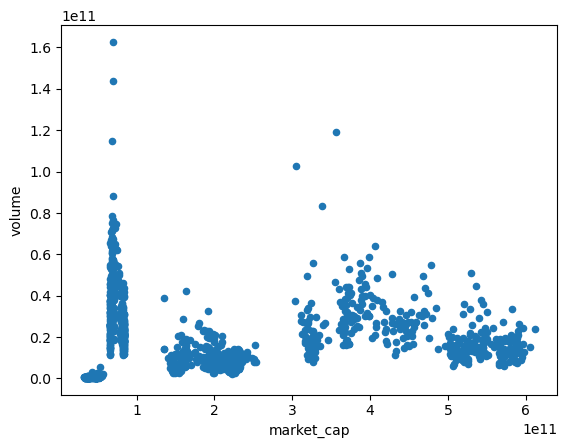

In [7]:
# Part 0

market_best.plot.scatter(x = 'market_cap', y = 'volume')

In [ ]:
# Part 1

In [ ]:
# Part 2

In [ ]:
# Part 3